In [4]:
from qiskit import *
from math import pi

## Zadanie 1

In [5]:
qnumber=2

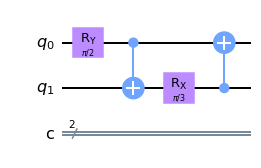

In [6]:
circ = QuantumCircuit(qnumber, qnumber)

circ.ry(pi/2, 0)
circ.cnot(0, 1)
circ.rx(pi/3, 1)
circ.cnot(1, 0)

circ.draw('mpl')

In [7]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**qnumber)
print(state)
state = state.evolve(circ)
state.draw('latex')

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [51]:
circ.measure(range(qnumber), range(qnumber))

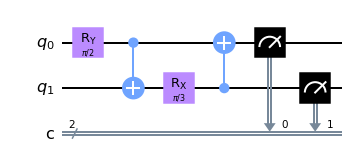

In [52]:
from qiskit import transpile

from qiskit.providers.aer import QasmSimulator

backend = QasmSimulator()

qc_compiled = transpile(circ, backend, optimization_level=3)

qc_compiled.draw('mpl')

In [53]:
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

In [54]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'11': 137, '01': 128, '10': 371, '00': 388}


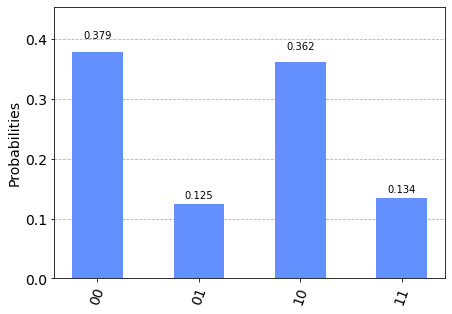

In [55]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [1]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
IBMQ.save_account('API_KEY', overwrite=True)
provider = IBMQ.get_provider(hub='ibm-q')
n=2

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > n and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q, group = None, project = None'

In [59]:
qc_compiled = transpile(circ, backend, optimization_level=3)

job = backend.run(qc_compiled, shots=1024)

from qiskit.tools.monitor import job_monitor

job_monitor(job, interval = 1)

result = job.result()

Job Status: job has successfully run


In [60]:
answer=result.get_counts()

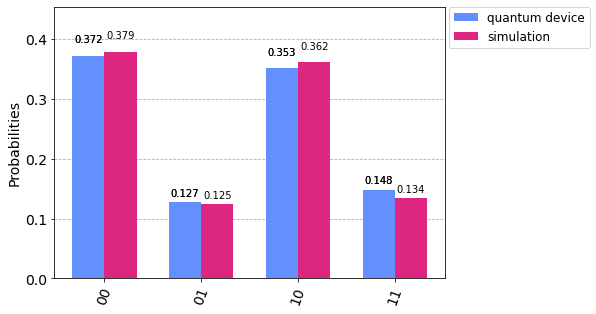

In [61]:
plot_histogram(data=[answer, counts], legend=['quantum device', 'simulation'])

Rożnice pomiędzy dokładnymi prawdopodobieństwami a symulacjami/obliczeniami na urządzeniu wynikają
z faktu, iż przy niskiej liczbie powtórzeń uzyskuje się mniejszą dokładność rozkładu wystąpień poszczególnych stanów.
Im większa liczba prób, tym bardziej zbliżamy się do przewidzianego rachunkowo rozkładu, jednak zawsze
wystąpią niewielkie rozbieżności (prawdopodobnie te rozbieżności będą mniejsze w symulacji, niż przy wykorzystaniu
obecnych komputerów kwantowych).

W utworzonym układzie nie widać większych różnic między symulacją a obliczeniami na komputerze kwantowym.
Żadna kombinacja stanów nie miała zerowego prawdopodobieństwa.
W rozpatrywanym układzie potencjalne błędy wynikające z niedoskonałości układów kwantowych stają się
mniej zauważalne - mogą wpływać na niewielkie zmiany wystąpień poszczególnych stanów.

## Zadanie 2

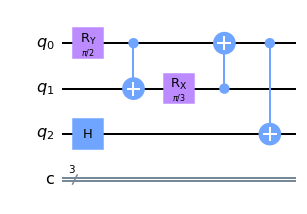

In [66]:
circ = QuantumCircuit(3, 3)

circ.ry(pi/2, 0)
circ.cnot(0, 1)
circ.rx(pi/3, 1)
circ.cnot(1, 0)
circ.h(2)
circ.cnot(0, 2)

circ.draw('mpl')

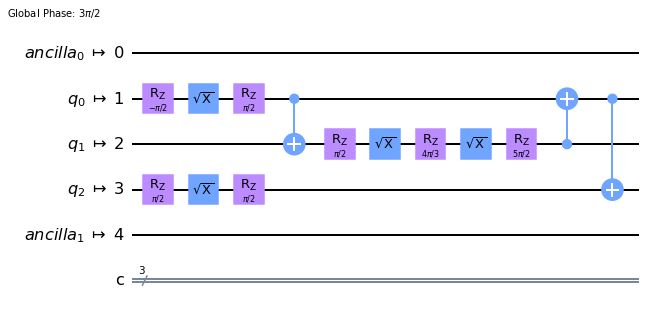

In [67]:
qc_compiled = transpile(circ, backend, optimization_level=3)

qc_compiled.draw('mpl')